In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly
import plotly.express as px

In [34]:
df = pd.read_csv('sample-playlist-audio-features.csv')
df.head()

,song,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms)
0,Gold Digger,0.629,0.696,1.0,-5.572,0.0,0.3480,0.0195,0.000000,0.0554,0.623,93.034,207627.0
1,All Falls Down,0.657,0.734,8.0,-4.832,0.0,0.4840,0.1490,0.000000,0.1390,0.434,91.030,223507.0
2,Hurricane,0.757,0.825,7.0,-4.062,0.0,0.0701,0.0398,0.000003,0.0798,0.446,95.010,243987.0
3,Life Of The Party (with André 3000),0.502,0.714,2.0,-6.668,1.0,0.2570,0.1380,0.000000,0.9700,0.305,79.136,391656.0
4,Jail,0.647,0.582,10.0,-9.538,0.0,0.0755,0.4100,0.000002,0.0715,0.915,167.396,146480.0


# Number of Songs

In [89]:
df.shape[0]

37

# How Alive is Your Playlist?

In [47]:
s = df[['Danceability', 'Energy', 'Liveness', 'Valence']].mean()
df1 = s.to_frame().reset_index() 
df1.rename(columns={'index': 'theta', 0: 'r'}, inplace = True)

fig = px.line_polar(df1, r='r', theta='theta', line_close=True)
fig.show()

# How Technical is your playlist?

In [49]:
s = df[['Acousticness', 'Instrumentalness', 'Speechiness','Liveness']].mean()
df1 = s.to_frame().reset_index() 
df1.rename(columns={'index': 'theta', 0: 'r'}, inplace = True)

fig = px.line_polar(df1, r='r', theta='theta', line_close=True)
fig.show()

# Playlist Song Key's

[Text(0.5, 1.0, "Song Key's In Your Playlist"), Text(0, 0.5, 'Song Count')]

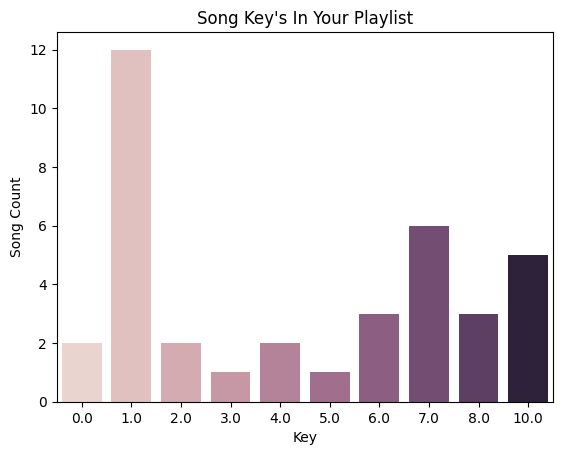

In [68]:

keys = df.Key.value_counts().sort_index(ascending = True)
g = sns.barplot(x=keys.index,y=keys.values, hue = keys.index,legend=False)
g.set(title = 'Song Key\'s In Your Playlist',ylabel='Song Count')


# Tempo Distribution

<Axes: xlabel='Tempo', ylabel='Density'>

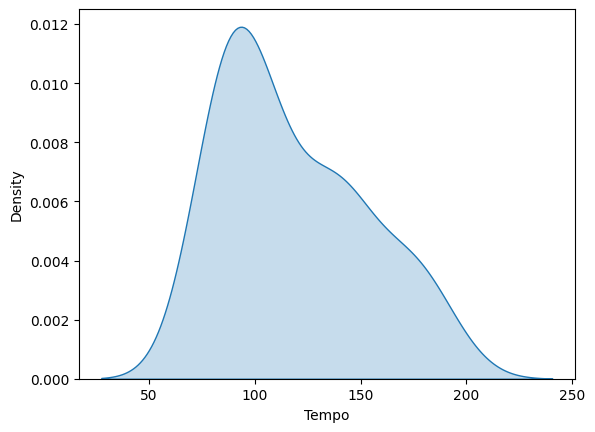

In [70]:
sns.kdeplot(data=df, x='Tempo', fill=True)

### Avg Tempo

In [78]:
df.Tempo.mean()

118.29275675675676

# Duration Distribution

<Axes: xlabel='Duration (s)', ylabel='Density'>

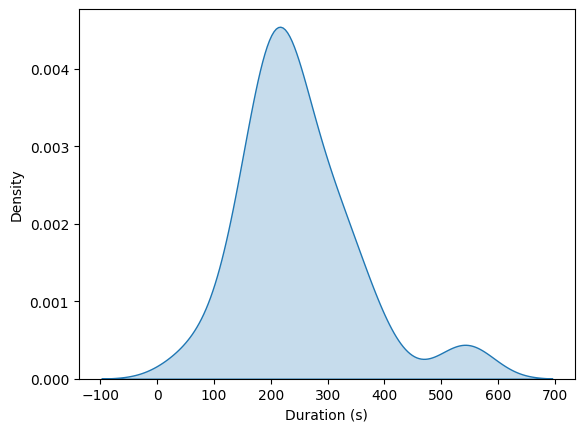

In [75]:
df['Duration (s)'] = df['Duration (ms)'] / 1000
sns.kdeplot(data=df, x='Duration (s)', fill = True)

### Avg Duration (Seconds)

In [77]:
df['Duration (s)'].mean()

248.92951351351357

# Tempo and Duration by Song

[Text(0.5, 1.0, 'Tempo vs. Duration')]

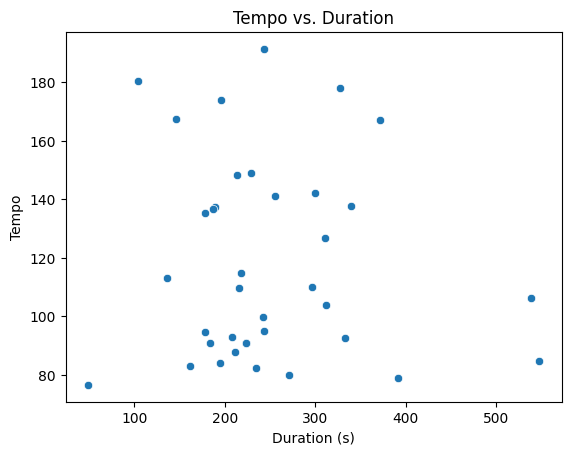

In [85]:
g = sns.scatterplot(data = df, x = 'Duration (s)', y = 'Tempo')
g.set(title='Tempo vs. Duration')

# Loudness (negative is louder, dB's are weird)

<Axes: xlabel='Loudness', ylabel='Density'>

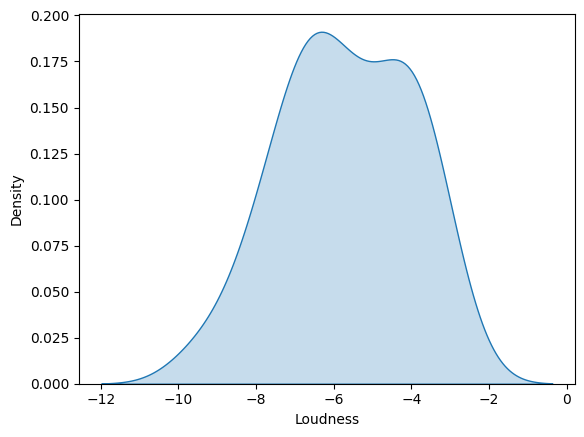

In [93]:
sns.kdeplot(data = df, x = 'Loudness', fill =True)

### Your loudest song

In [102]:
df[df.Loudness ==df.Loudness.max()][['song', 'Loudness']]

,song,Loudness
35,Bound 2,-2.821


### Your quietest song

In [101]:
df[df.Loudness == df.Loudness.min()][['song', 'Loudness']]

,song,Loudness
4,Jail,-9.538
